In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Bitcoin.csv')

In [3]:
def checkmove(row):
    if row['open'] < row['close']:
        return 'Apreciated'
    elif row['open'] > row['close']:
        return 'Depreciated'
    else:
        return 'Same'
    
df['movement'] = df.apply(checkmove, axis=1)

In [4]:
df.drop(columns= ['date']).groupby('movement').agg(['count', 'mean'])

open                high                 low               close  \
            count          mean count          mean count          mean count   
movement                                                                        
Apreciated   1858  15240.782363  1858  15793.496997  1858  15067.251432  1858   
Depreciated  1649  16722.959727  1649  16893.268975  1649  16070.627101  1649   
Same            1    334.590000     1    336.530000     1    330.640000     1   

                           
                     mean  
movement                   
Apreciated   15631.101523  
Depreciated  16319.212887  
Same           334.590000

In [5]:
def percentege(row):
    theper = (((row['close']-row['open'])/row['close'])*100)
    return round(theper, 2)
df['percent'] = df.apply(percentege, axis=1)

In [6]:
df['date'] = df['date'].apply(pd.to_datetime)

In [7]:
df['week_day'] = df['date'].dt.day_name()

In [8]:
outOfCurve = df[df['percent'] > 10]
display(outOfCurve)
len(df[df['percent'] > 10])

,date,open,high,low,close,movement,percent,week_day
786,2022-02-28,37706.00,43760.46,37518.21,43193.23,Apreciated,12.70,Monday
810,2022-02-04,37149.27,41527.79,37093.63,41500.88,Apreciated,10.49,Friday
1050,2021-06-09,33416.98,37537.37,32475.87,37345.12,Apreciated,10.52,Wednesday
1066,2021-05-24,34700.36,39835.14,34551.08,38705.98,Apreciated,10.35,Monday
1171,2021-02-08,38886.83,46203.93,38076.32,46196.46,Apreciated,15.82,Monday
1456,2020-04-29,7806.71,8871.75,7786.05,8801.04,Apreciated,11.30,Wednesday
1497,2020-03-19,5245.42,6329.74,5236.97,6191.19,Apreciated,15.28,Thursday
1643,2019-10-25,7490.70,8691.54,7479.98,8660.70,Apreciated,13.51,Friday
1762,2019-06-28,11162.17,12445.17,10914.50,12407.33,Apreciated,10.04,Friday
1802,2019-05-19,7267.96,8261.94,7267.96,8197.69,Apreciated,11.34,Sunday


29

In [9]:
df['week_day'] = df['date'].dt.day_name()

In [10]:
moveToWeek = df.groupby(['week_day','movement']).agg('count')['close']
display(moveToWeek)
(moveToWeek.loc['Friday','Apreciated']/len(df))*100

week_day   movement   
Friday     Apreciated     276
           Depreciated    225
Monday     Apreciated     272
           Depreciated    229
Saturday   Apreciated     278
           Depreciated    223
Sunday     Apreciated     255
           Depreciated    246
Thursday   Apreciated     254
           Depreciated    247
Tuesday    Apreciated     265
           Depreciated    236
Wednesday  Apreciated     258
           Depreciated    243
           Same             1
Name: close, dtype: int64

7.8677309007981755

In [11]:
df.groupby('movement').agg('count')['close']['Apreciated']

1858

In [12]:
depreciated = {}
apreciated = {}
key = 0
for i in moveToWeek.items():
    toWhole = ((moveToWeek[i[0]]/len(df))*100)
    if i[0][1] == 'Apreciated':
        toMove = ((moveToWeek[i[0]]/(df.groupby('movement').agg('count')['close'][i[0][1]]))*100)
        apreciated[key] = {i[0][0]: round(toWhole, 2),
                           'To Move': round(toMove, 2)
                           }
    elif i[0][1] == 'Same':
        continue
    else:
        toMove = ((moveToWeek[i[0]]/(df.groupby('movement').agg('count')['close'][i[0][1]]))*100)
        depreciated[key] = {i[0][0]: round(toWhole, 2),
                           'To Move': round(toMove, 2)
                           }
    key+=1
        
display(apreciated)
display(depreciated)

{0: {'Friday': 7.87, 'To Move': 14.85},
 2: {'Monday': 7.75, 'To Move': 14.64},
 4: {'Saturday': 7.92, 'To Move': 14.96},
 6: {'Sunday': 7.27, 'To Move': 13.72},
 8: {'Thursday': 7.24, 'To Move': 13.67},
 10: {'Tuesday': 7.55, 'To Move': 14.26},
 12: {'Wednesday': 7.35, 'To Move': 13.89}}

{1: {'Friday': 6.41, 'To Move': 13.64},
 3: {'Monday': 6.53, 'To Move': 13.89},
 5: {'Saturday': 6.36, 'To Move': 13.52},
 7: {'Sunday': 7.01, 'To Move': 14.92},
 9: {'Thursday': 7.04, 'To Move': 14.98},
 11: {'Tuesday': 6.73, 'To Move': 14.31},
 13: {'Wednesday': 6.93, 'To Move': 14.74}}

In [13]:
df

,date,open,high,low,close,movement,percent,week_day
0,2024-04-24,66420.40,67053.77,63702.55,64317.48,Depreciated,-3.27,Wednesday
1,2024-04-23,66839.89,67199.24,65864.87,66407.27,Depreciated,-0.65,Tuesday
2,2024-04-22,64935.63,67233.96,64548.18,66837.68,Apreciated,2.85,Monday
3,2024-04-21,64992.82,65723.24,64277.72,64926.64,Depreciated,-0.10,Sunday
4,2024-04-20,63851.10,65442.46,63172.40,64994.44,Apreciated,1.76,Saturday
...,...,...,...,...,...,...,...,...
3503,2014-09-21,408.08,412.43,393.18,398.82,Depreciated,-2.32,Sunday
3504,2014-09-20,394.67,423.30,389.88,408.90,Apreciated,3.48,Saturday
3505,2014-09-19,424.10,427.83,384.53,394.80,Depreciated,-7.42,Friday
3506,2014-09-18,456.86,456.86,413.10,424.44,Depreciated,-7.64,Thursday


In [14]:
# The idea here is to create an identifier that enables us to group days by week.
# So were creating 2 columns, iso_week and iso_year for that purpose.
df = df.sort_values(by="date")
df['iso_year'] = df['date'].dt.isocalendar().year
df['iso_week'] = df['date'].dt.isocalendar().week

# Create a unique identifier for each ISO year-week combination
df['iso_year_week'] = df['iso_year'].astype(str) + '_W' + df['iso_week'].astype(str)
df

,date,open,high,low,close,movement,percent,week_day,iso_year,iso_week,iso_year_week
3507,2014-09-17,465.86,468.17,452.42,457.33,Depreciated,-1.87,Wednesday,2014,38,2014_W38
3506,2014-09-18,456.86,456.86,413.10,424.44,Depreciated,-7.64,Thursday,2014,38,2014_W38
3505,2014-09-19,424.10,427.83,384.53,394.80,Depreciated,-7.42,Friday,2014,38,2014_W38
3504,2014-09-20,394.67,423.30,389.88,408.90,Apreciated,3.48,Saturday,2014,38,2014_W38
3503,2014-09-21,408.08,412.43,393.18,398.82,Depreciated,-2.32,Sunday,2014,38,2014_W38
...,...,...,...,...,...,...,...,...,...,...,...
4,2024-04-20,63851.10,65442.46,63172.40,64994.44,Apreciated,1.76,Saturday,2024,16,2024_W16
3,2024-04-21,64992.82,65723.24,64277.72,64926.64,Depreciated,-0.10,Sunday,2024,16,2024_W16
2,2024-04-22,64935.63,67233.96,64548.18,66837.68,Apreciated,2.85,Monday,2024,17,2024_W17
1,2024-04-23,66839.89,67199.24,65864.87,66407.27,Depreciated,-0.65,Tuesday,2024,17,2024_W17


In [15]:
highest_price_daypweek = df.groupby(["iso_year_week", "week_day"])["high"].agg("min").reset_index()

lowest_price_daypweek = df.groupby(["iso_year_week", "week_day"])["low"].agg("min").reset_index()
lowest_price_daypweek

,iso_year_week,week_day,low
0,2014_W38,Friday,384.53
1,2014_W38,Saturday,389.88
2,2014_W38,Sunday,393.18
3,2014_W38,Thursday,413.10
4,2014_W38,Wednesday,452.42
...,...,...,...
3503,2024_W9,Saturday,61657.29
3504,2024_W9,Sunday,61435.02
3505,2024_W9,Thursday,60498.73
3506,2024_W9,Tuesday,54484.20


In [16]:
index_keep_high = highest_price_daypweek.groupby("iso_year_week")["high"].idxmax().values
index_keep_low = lowest_price_daypweek.groupby("iso_year_week")["low"].idxmin().values


In [17]:
max_per_week = highest_price_daypweek.loc[index_keep_high]
weekday_count = max_per_week["week_day"].value_counts()
total_count = weekday_count.sum()
day_percentages = (weekday_count/ total_count) * 100

desired_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_series_sorted = day_percentages.reindex(desired_order)
x = day_series_sorted
x = x.reset_index()
x.columns = ["week_day", "percentage"]
x


,week_day,percentage
0,Monday,25.498008
1,Tuesday,12.749004
2,Wednesday,11.354582
3,Thursday,9.760956
4,Friday,9.561753
5,Saturday,11.354582
6,Sunday,19.721116


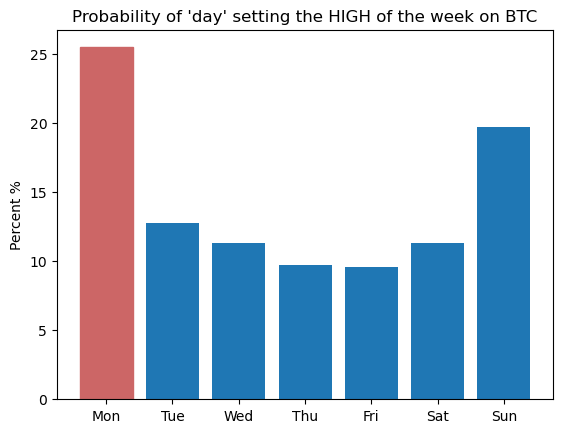

In [18]:
bar_object = plt.bar(x["week_day"], x["percentage"] )
plt.title("Probability of 'day' setting the HIGH of the week on BTC")
plt.ylabel("Percent %", rotation = "vertical")
plt.xticks(desired_order, labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
bar_object[0].set_color('#cc6666')

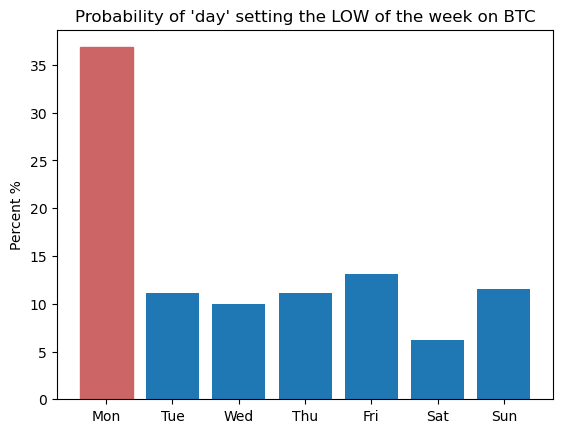

In [19]:
min_per_week = lowest_price_daypweek.loc[index_keep_low]
weekday_count_min = min_per_week["week_day"].value_counts()
total_count_min = weekday_count_min.sum()
day_percentages_min = (weekday_count_min/ total_count_min) * 100
day_percentages_min

day_series_sorted = day_percentages_min.reindex(desired_order)
x = day_series_sorted
x = x.reset_index()
x.columns = ["week_day", "percentage"]

bar_objects = plt.bar(x["week_day"], x["percentage"] )
plt.title("Probability of 'day' setting the LOW of the week on BTC")
plt.ylabel("Percent %", rotation = "vertical")
plt.xticks(desired_order, labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
bar_objects[0].set_color('#cc6666')